In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential  
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization, Input,AveragePooling2D
from glob import glob
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator    
from tensorflow.keras.utils import load_img, img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

In [4]:
#dataset of fake real recognition
train_path = '/Users/akshat/Downloads/Indian Currency Dataset/train'
validation_path = 'test'

In [5]:
# no. of classes in recognition data
className = glob(train_path + "/*")
NumberofClass = len(className)
print("NumberofClass:", NumberofClass)

NumberofClass: 2


In [6]:
# data augumentation 
train_datagen = ImageDataGenerator(rescale=1/255)    
validation_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [7]:
batch_size = 10
# recognition data

train_datagen = ImageDataGenerator(rescale=1/255,
                  shear_range=0.3,
                  horizontal_flip=True,
                  zoom_range=0.3
                  )
val_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                train_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

val_generator = val_datagen.flow_from_directory(
                validation_path,
                target_size=(224,224),
                batch_size=batch_size,
                color_mode="rgb",
                class_mode="categorical"
                )

Found 248 images belonging to 2 classes.
Found 107 images belonging to 2 classes.


In [8]:
train_generator.class_indices

{'fake': 0, 'real': 1}

In [9]:
input_shape=(224,224,3)
# model = Model(inputs=[inputs], outputs=output_layer)
def build_siamese_model(input_shape):
    # Define input layer
    inputs = Input(shape=input_shape)

    # Define 2D Scattering transform layer
    # Plot Scattering coefficients
    # scattering = Scattering2D(J=2)(inputs)
    # model = tf.transpose(scattering,perm=[0, 3, 2, 1])

#     scattering = scattering_net(inputs)
#     model = Lambda(wavelets, inputs)(i)
    model = (Conv2D(32, (3, 3),strides=2,padding='same', activation='relu',data_format='channels_last' ,input_shape=input_shape))(inputs)
    model = (BatchNormalization())(model)
    model = (Conv2D(64, (3, 3),strides=2,padding='same', activation='relu',data_format='channels_last', input_shape=input_shape))(model)
    model = (BatchNormalization())(model)
    model = (MaxPooling2D(pool_size=(2, 2), strides=2,data_format='channels_last'))(model)
    model = (Conv2D(128, (3, 3),strides=2,padding='same', activation='relu',data_format='channels_last', input_shape=input_shape))(model)
    model = (BatchNormalization())(model)
    model = (AveragePooling2D(pool_size=(2, 2), strides=2,data_format='channels_last'))(model)
    model = (Flatten())(model)
    model = (Dense(2056))(model)
    model = tf.keras.layers.Dropout(0.2)(model) 
    model = (Dense(512))(model)
    model = tf.keras.layers.Dropout(0.2)(model) 
    model = (Dense(256))(model)
    model = (Dense(2,activation="sigmoid"))(model)

    #     outputs = (Dense(16))(model)
    X = model

    # Bui4ld model
    model = Model(inputs=inputs, outputs=X)

    return model
model = build_siamese_model(input_shape)


In [10]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 112, 112, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 56, 56, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 64)        0     

In [17]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    batch_size = 128,
                    epochs = 20)

Epoch 1/20
25/25 [==============================] - 7s 288ms/step - loss: 2.5858 - accuracy: 0.6573 - val_loss: 0.7475 - val_accuracy: 0.4860
Epoch 2/20
25/25 [==============================] - 7s 280ms/step - loss: 1.8527 - accuracy: 0.7016 - val_loss: 1.9446 - val_accuracy: 0.4486
Epoch 3/20
25/25 [==============================] - 7s 275ms/step - loss: 1.5933 - accuracy: 0.7097 - val_loss: 2.3810 - val_accuracy: 0.4486
Epoch 4/20
25/25 [==============================] - 7s 276ms/step - loss: 1.2382 - accuracy: 0.7581 - val_loss: 2.6609 - val_accuracy: 0.4486
Epoch 5/20
25/25 [==============================] - 7s 277ms/step - loss: 1.0417 - accuracy: 0.7984 - val_loss: 1.1919 - val_accuracy: 0.5514
Epoch 6/20
25/25 [==============================] - 7s 276ms/step - loss: 0.6421 - accuracy: 0.8145 - val_loss: 1.8715 - val_accuracy: 0.6075
Epoch 7/20
25/25 [==============================] - 7s 280ms/step - loss: 1.6150 - accuracy: 0.8024 - val_loss: 1.4857 - val_accuracy: 0.5981
Epoch 

/var/folders/86/byr14vbn11x4b2wntphrkxzc0000gn/T/ipykernel_6522/76440553.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(history.history['val_accuracy'], 'go--', c="red")


<Figure size 640x480 with 0 Axes>

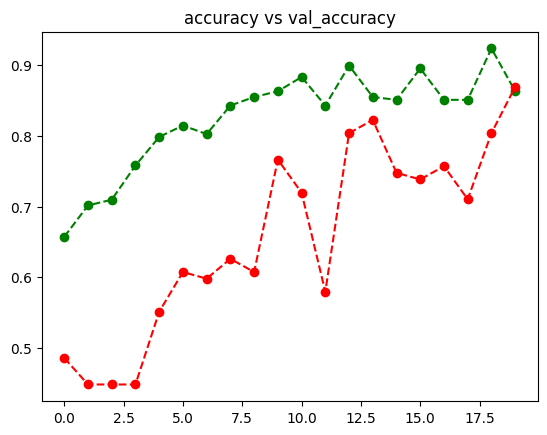

<Figure size 640x480 with 0 Axes>

In [18]:
#plot for fake vs real classification
plt.plot(history.history['accuracy'], 'go--')

plt.plot(history.history['val_accuracy'], 'go--', c="red")

plt.title("accuracy vs val_accuracy")

plt.figure()

/var/folders/86/byr14vbn11x4b2wntphrkxzc0000gn/T/ipykernel_6522/923266679.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(history.history['val_loss'], 'go--', c="red")


Text(0.5, 1.0, 'loss vs val_loss')

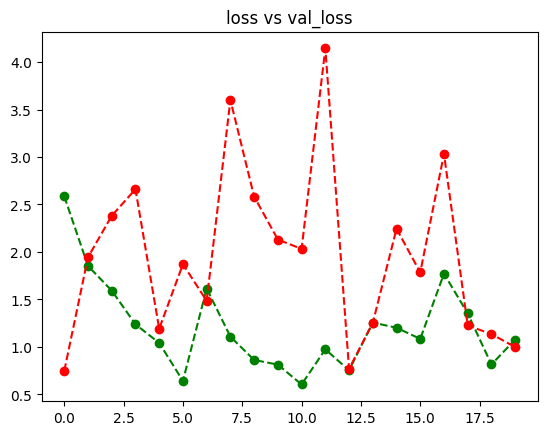

In [19]:
plt.plot(history.history['loss'], 'go--')
plt.plot(history.history['val_loss'], 'go--', c="red")

plt.title("loss vs val_loss")

In [57]:
#TESTING

In [28]:
import cv2
test_image_fake = cv2.imread('/Users/akshat/Downloads/Indian Currency Dataset/test/fake/test (11).jpg')
test_image_real = cv2.imread('/Users/akshat/Downloads/Indian Currency Dataset/test/real/test (44).jpg')

test_image_fake = cv2.resize(test_image_fake/255,(224,224))
test_image_real = cv2.resize(test_image_real/255,(224,224))

result = model.predict(np.expand_dims(test_image_fake,0))
print(np.round(result[0][1]))
result = model.predict(np.expand_dims(test_image_real,0))
print(np.round(result[0][1]))

1/1 [==============================] - 0s 12ms/step
0.0
1/1 [==============================] - 0s 12ms/step
0.0
